In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# VIF function
from statsmodels.stats.outliers_influence import variance_inflation_factor

# make dmatrix
from patsy import dmatrix

# make OLS
import statsmodels.api as sm

In [19]:
train = pd.read_csv('rename.csv')
train.tail()

,Team,Possession,SOT,Shots,Touches,Passes,Tackles,Clearances,Corners,Offsides,Goal,Year,Home,Result
3795,Stoke City,39.0,3,14,510,319,16,29,10,2,1,2016,0,1
3796,Swansea City,65.3,2,12,795,589,17,17,7,1,2,2016,1,1
3797,West Bromwich Albion,34.7,5,16,500,316,18,24,4,0,1,2016,0,0
3798,Watford,32.9,3,6,440,297,20,6,4,0,0,2016,1,0
3799,Manchester City,67.1,9,15,789,620,19,13,5,2,5,2016,0,1


In [20]:
# check shape
print('Shape :', train.shape)

Shape : (3800, 14)


In [21]:
# check information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 14 columns):
Team          3800 non-null object
Possession    3800 non-null float64
SOT           3800 non-null int64
Shots         3800 non-null int64
Touches       3800 non-null int64
Passes        3800 non-null int64
Tackles       3800 non-null int64
Clearances    3800 non-null int64
Corners       3800 non-null int64
Offsides      3800 non-null int64
Goal          3800 non-null int64
Year          3800 non-null int64
Home          3800 non-null int64
Result        3800 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 415.7+ KB


In [22]:
train.describe()

,Possession,SOT,Shots,Touches,Passes,Tackles,Clearances,Corners,Offsides,Goal,Year,Home,Result
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.0000,3800.000000,3800.000000
mean,50.000000,4.375789,13.206579,643.061579,436.440789,18.872105,29.192368,5.385526,2.119211,1.363158,2014.0000,0.500000,0.871053
std,10.904472,2.483076,5.493609,113.553282,112.985673,5.603130,11.772101,2.969096,1.644264,1.246722,1.4144,0.500066,0.779241
min,19.600000,0.000000,1.000000,360.000000,185.000000,5.000000,4.000000,0.000000,0.000000,0.000000,2012.0000,0.000000,0.000000
25%,42.000000,3.000000,9.000000,559.000000,352.000000,15.000000,21.000000,3.000000,1.000000,0.000000,2013.0000,0.000000,0.000000
50%,50.000000,4.000000,12.000000,635.000000,426.000000,18.000000,28.000000,5.000000,2.000000,1.000000,2014.0000,0.500000,1.000000
75%,58.000000,6.000000,16.000000,719.000000,510.000000,22.000000,36.000000,7.000000,3.000000,2.000000,2015.0000,1.000000,1.000000
max,80.400000,17.000000,43.000000,1032.000000,848.000000,44.000000,93.000000,19.000000,13.000000,8.000000,2016.0000,1.000000,2.000000


In [39]:
# Unique
for i in range(14):
    print('{} : {}'.format(train.columns[i], len(set(train[train.columns[i]]))))

Team : 28
Possession : 509
SOT : 18
Shots : 40
Touches : 536
Passes : 530
Tackles : 37
Clearances : 77
Corners : 20
Offsides : 13
Goal : 9
Year : 5
Home : 2
Result : 3


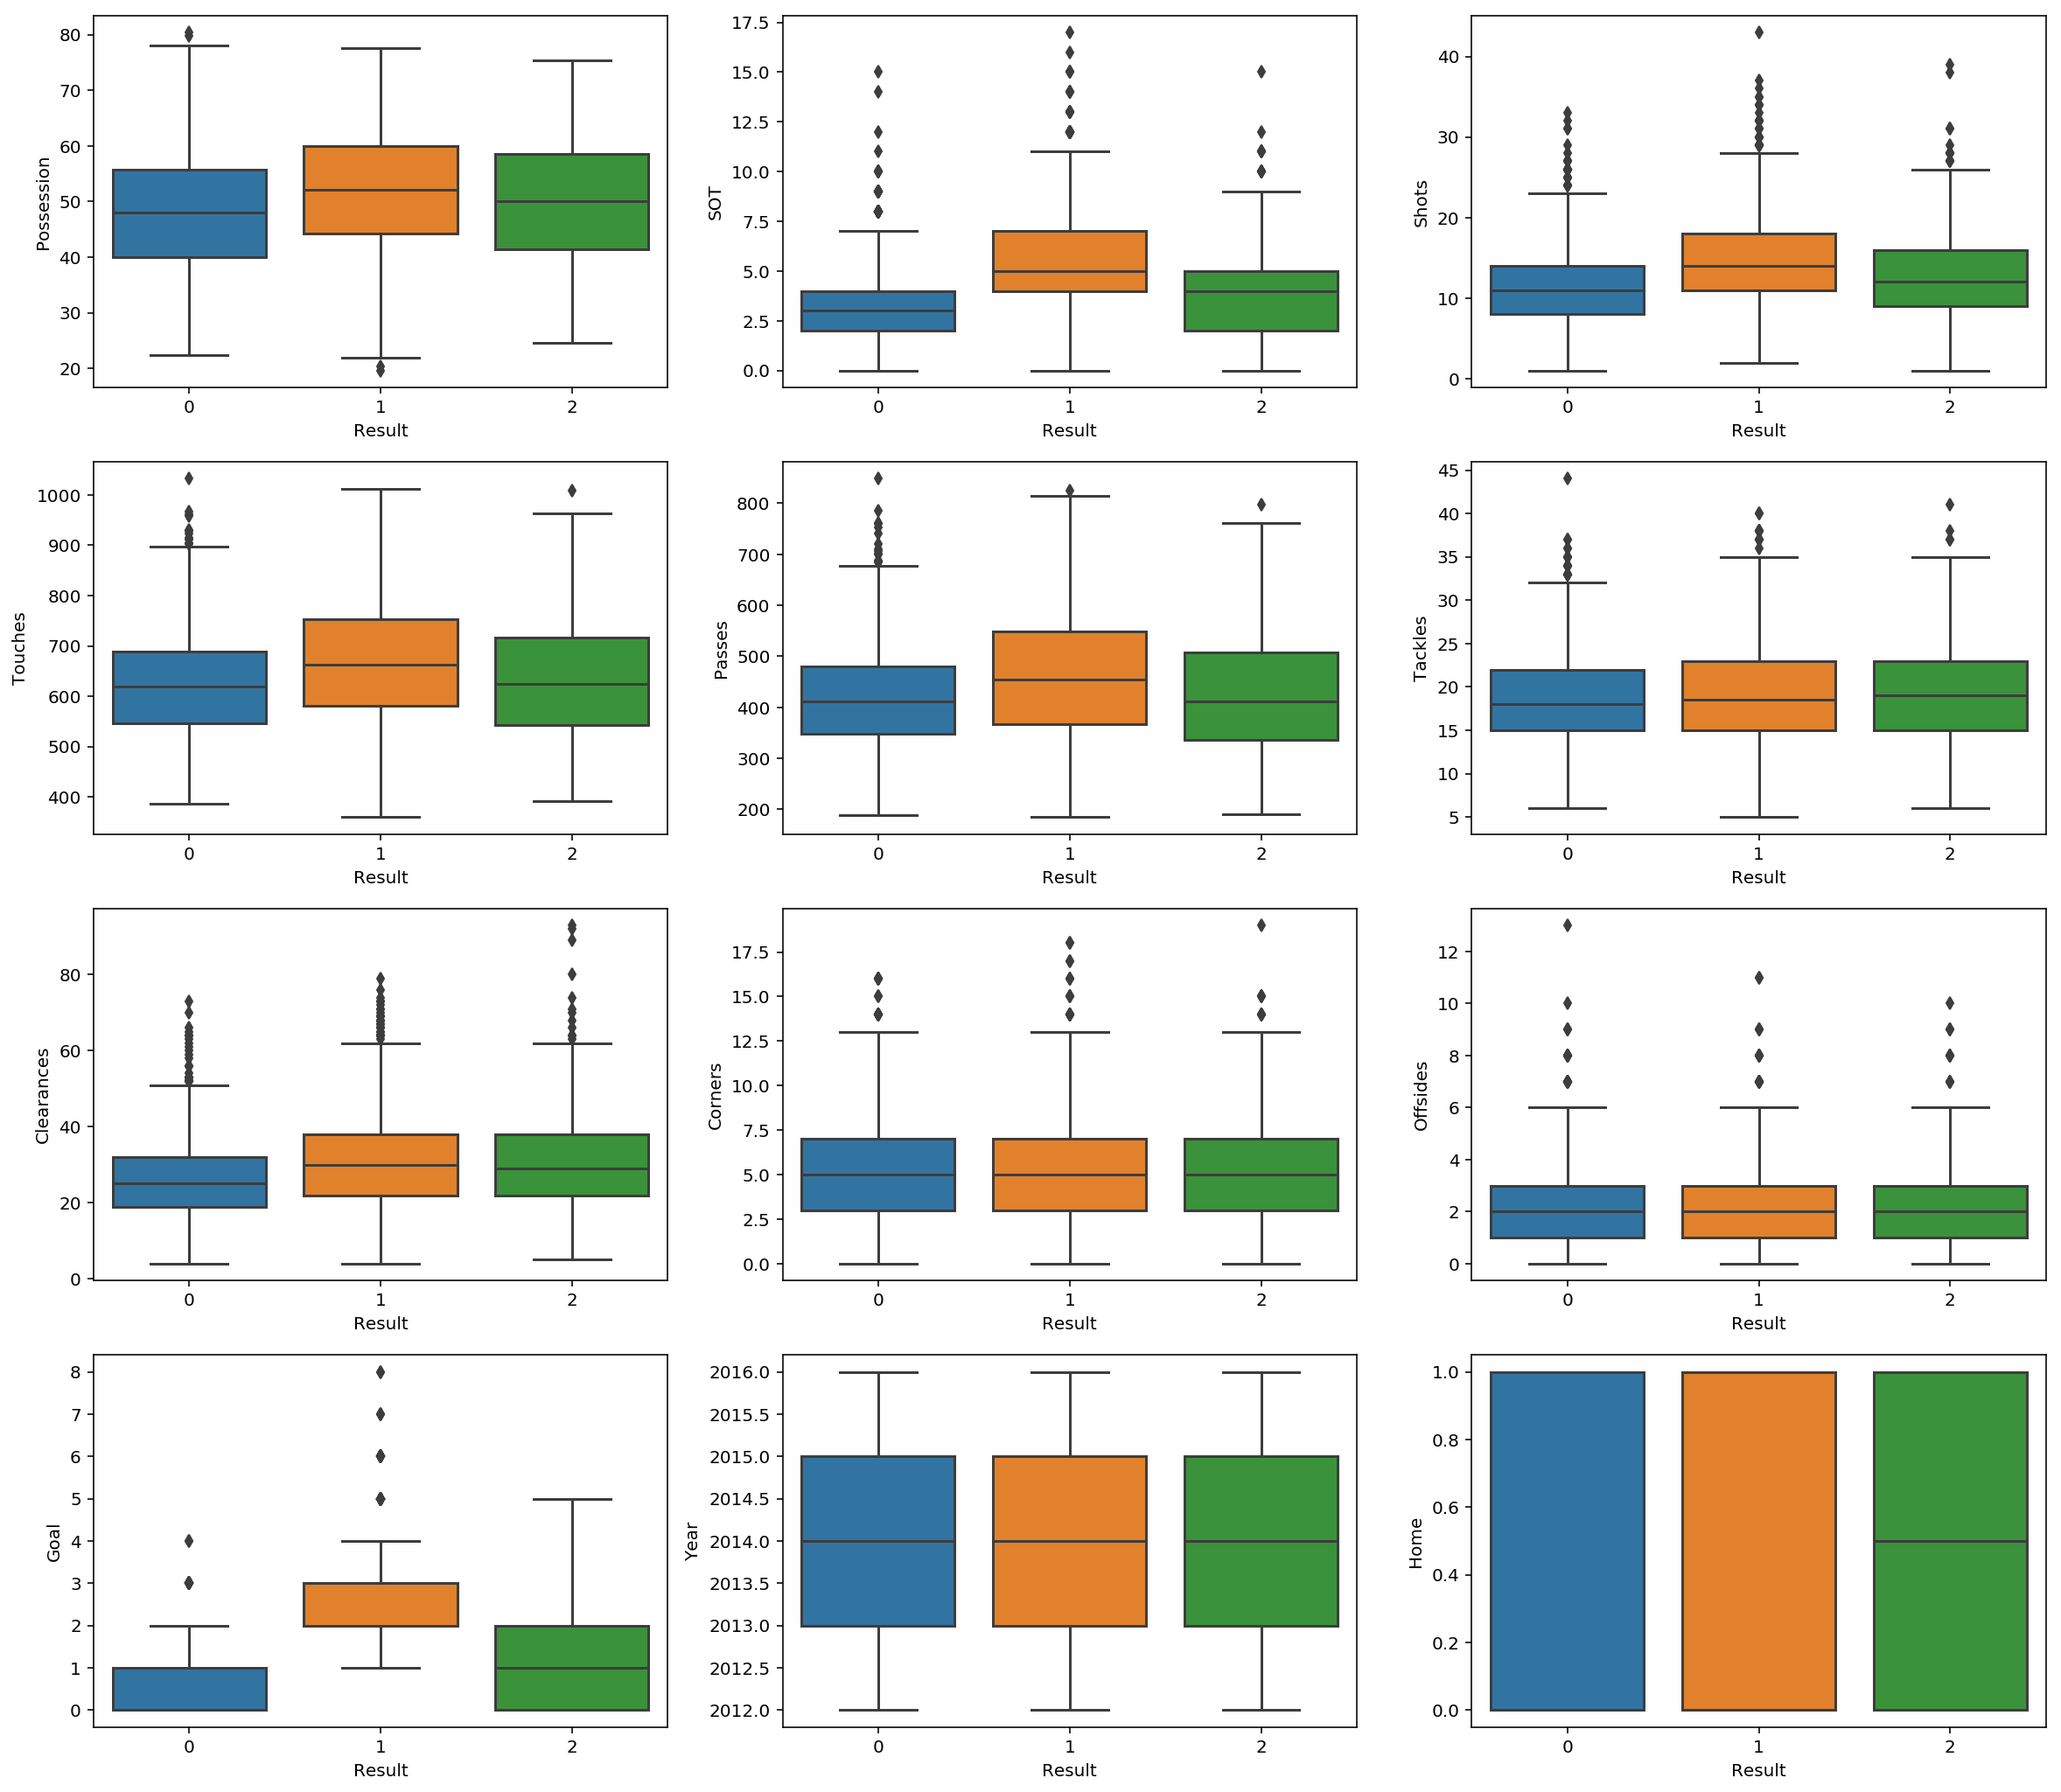

In [35]:
# feature boxplot
plt.figure(figsize=(20, 18))

for i in range(1, 12+1) :
    plt.subplot(4, 3, i)
    sns.boxplot(x = train['Result'], y = train[train.columns[i]], data = train)

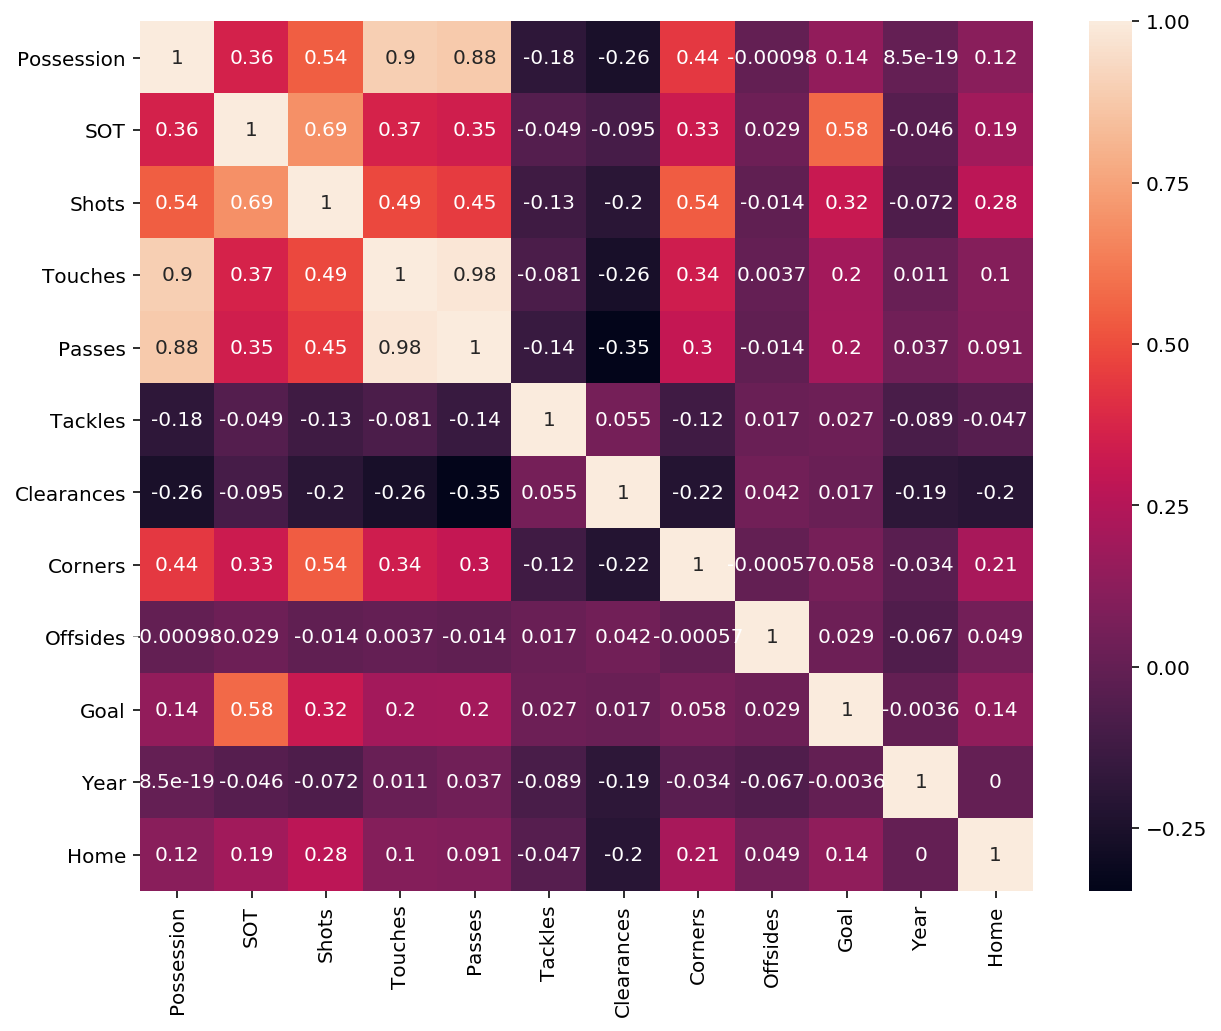

In [34]:
# correlation
correlation = train.drop(['Team', 'Result'], axis = 1)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation.corr(), annot=True)
plt.show()

In [41]:
train.describe()

,Possession,SOT,Shots,Touches,Passes,Tackles,Clearances,Corners,Offsides,Goal,Year,Home,Result
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.0000,3800.000000,3800.000000
mean,50.000000,4.375789,13.206579,643.061579,436.440789,18.872105,29.192368,5.385526,2.119211,1.363158,2014.0000,0.500000,0.871053
std,10.904472,2.483076,5.493609,113.553282,112.985673,5.603130,11.772101,2.969096,1.644264,1.246722,1.4144,0.500066,0.779241
min,19.600000,0.000000,1.000000,360.000000,185.000000,5.000000,4.000000,0.000000,0.000000,0.000000,2012.0000,0.000000,0.000000
25%,42.000000,3.000000,9.000000,559.000000,352.000000,15.000000,21.000000,3.000000,1.000000,0.000000,2013.0000,0.000000,0.000000
50%,50.000000,4.000000,12.000000,635.000000,426.000000,18.000000,28.000000,5.000000,2.000000,1.000000,2014.0000,0.500000,1.000000
75%,58.000000,6.000000,16.000000,719.000000,510.000000,22.000000,36.000000,7.000000,3.000000,2.000000,2015.0000,1.000000,1.000000
max,80.400000,17.000000,43.000000,1032.000000,848.000000,44.000000,93.000000,19.000000,13.000000,8.000000,2016.0000,1.000000,2.000000


In [40]:
train.columns

Index(['Team', 'Possession', 'SOT', 'Shots', 'Touches', 'Passes', 'Tackles',
       'Clearances', 'Corners', 'Offsides', 'Goal', 'Year', 'Home', 'Result'],
      dtype='object')

In [43]:
from sklearn.preprocessing import LabelEncoder
def category_to_ohe(train_col):
    le = LabelEncoder()
    le.fit(train_col)
    
    labeled_train_col = le.transform(train_col)
    labeled_train_col = labeled_train_col.reshape(len(labeled_train_col),1)
      
    return labeled_train_col

In [48]:
# Select columns

category = ['SOT', 'Corners', 'Offsides', 'Goal', 'Home']
continuous = ['Possession', 'Shots', 'Touches', 'Passes',
             'Tackles', 'Clearances']


train_cols = []

for cat in category:
    train_tok = category_to_ohe(train[cat])
    train_cols.append(train_tok)
    print(cat,' finished !')

SOT  finished !
Corners  finished !
Offsides  finished !
Goal  finished !
Home  finished !


In [50]:
for con in continuous:
    train_cols.append(train[con].values.reshape(len(train),1))
    print(con,' finished !')

Possession  finished !
Shots  finished !
Touches  finished !
Passes  finished !
Tackles  finished !
Clearances  finished !


In [55]:
X_train = np.hstack(tuple(each for each in train_cols))
y_train = train['Result']

In [56]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

clf = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_split = 10, criterion = 'entropy')
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
predict_proba = clf.predict_proba(X_test)

NameError: name 'X_test' is not defined

In [58]:
np.argmax(predict_proba)

NameError: name 'predict_proba' is not defined